# Background & Objective
**Background**: 
<br>
According to data collected from Interactive Media in Retail Group (IMRG), there were 5000% increase of consumer buy product from online platform in year 2010 compared to year 2000. This huge increase in just 10 years indicate that there are fundamental changes in the way consumer shop product.
<br><br>
To be able to keep up with the changes of consumer buying behavior, company must adapted so they don't lose it's consumer and also expand it's market range. Many big company have enough fund and resource to adapted to this change, but many small retailers doesn't have enough resourse to transform itself. 
<br><br>
The data that we will be using this time originated from a small retailer located in UK consisting of 80 members. The retailer is registered as non-store business. The retailer that was found in 1981 mainly selling unique all-occation gifts. For years in the past, this retail heavily relied on direct mailing catalogue and order were taken over phone calls. But in the past two years, they tried to transform it's business adapting to the internet boom by creating website for selling the product and using Amazon to sell and market it's product. It's seems thou that the retailer still doesn't have enough understanding upon it's consumer.  
<br><br>
This project was taken in order for small online retailers and new entrants to the retail sector to be able have better understanding about it's consumer and create marketing plan based on consumer focused.  
<br>**Objective**:
<br>
* Getting business insight about the retailer performance originated from UK in the span of the data collected.
* Getting business insight about consumer originated from UK in the span of the data collected
* Create a clustering model to identify segmentation of it's consumer and using those information to decide where, when, how, and to whom a product, service, or brand will be marketed.
* To increase marketing efficiency by directing effort specifically toward the designated segment in a manner consistent with that segment’s characteristics.

# Problem Statement
**Goal**:
* Getting business insight about the retailer performance in the span of the data collected.
* Getting business insight about consumer in the span of the data collected
* Create a clustering model to identify segmentation of it's consumer and using those information to decide where, when, how, and to whom a product, service, or brand will be marketed.
* To increase marketing efficiency by directing effort specifically toward the designated segment in a manner consistent with that segment’s characteristics.
<br>

**Research Question**:
<br>
* Who are our best customers in UK?
* Who has the potential to be converted in more profitable customers in UK?
* Which customer we must retain in UK?
* Which group of customers is most likely to respond to our current campaign in UK?
<br>

**Business Benefit**:
<br>
* Retailer know how to treat consumer that originated from UK with spesific criteria
* Retailer able to create product differentiation based on the characteristic of each consumer that originated from UK
<br>

**Expected Outcome**:
<br>
* Had business insight about the retailer performance in the span of the data collected.
* Had business insight about consumer originated from UK in the span of the data collected
* Consumer segmentation analysis
* Recommendation based on customer segmentation
<br>

**(Note: We will do RFM Analysis and combine it with predictive algorithm to achive in depth insight)**

# Data Source
The data was taken from Online Retail II data set source from UCI Machine Learning Library: 
<br>
https://archive.ics.uci.edu/ml/datasets/Online+Retail+II
<br>
<br>
Dataset contain all the transaction occuring for a UK-based and registered non-store online retail between 01/12/2009 and 09/12/2011. The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers
<br>
<br>
It was mention in UCI Machine Learning Library that the data was taken for the purpose of research and was publish in Journal of Database Marketing & Customer Strategy Management. Below attached citation pertaining the research:
<br>
<b>Chen, D. Sain, S.L., and Guo, K. (2012), Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208.</b>

# Data Dictionary
The dataset contain one csv file called `online_retail_II.xlsx`. The data set contain 8 feature/column The description upon each feature in `online_retail_II` will be mention below:
* `InvoiceNo`= Invoice number. Nominal. A 6-Digit integral number uniquely assigned to each transaction. <b>(if this code starts with the letter 'c', it indicates a cancellation)</b>
* `StockCode` = Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product
* `Quantity`: The quantitites of each product (item) per transaction. (Numeric)
* `Description`: Product (item) name. Nominal
* `InvoiceDate`: Invoice date and time. Numeric. The day and time when a transaction was generated
* `UnitPrice`: Unit Price. Numeric. Product price per unit in sterling
* `CustomerID`: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer
* `Country`: Country name. Nominal. The name of the country where a customer resides.

# Import Relevant Package

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

# Import Data

In [3]:
df = pd.read_excel("online_retail_II.xlsx")

# Preliminary Look to The Data

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [6]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


We found few think after looking through the data:
* There were null value in `Customer_ID` and `Description` feature
* There were negative value in `Quantity` and `Price`. After reading data description, it was suspected that the negative value cause by someone cancelling order. We will look further about this

# Data Cleaning
Split into three parts:
1. Checking and Handling missing value
2. Checking and Handling duplicated value

## 1. Checking and Handling Missing Value

In [7]:
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [8]:
df.isna().sum() * 100 / df.shape[0]

Invoice         0.000000
StockCode       0.000000
Description     0.557225
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    20.539488
Country         0.000000
dtype: float64

By looking thorough total missing value in each feature, as describe above itu was found that `Description` and `Customer ID` had null value.
<br> 
Because `Customer ID` had ~20% of the data missing, the general rule of thumb is to impute the data for preventing many crucial insight not included when creating a model. But because `Customer ID`is an ID that used to identify consumer, we cannot just randomly generated it. So the best way to do deal the data is just drop it. 
<br>
(P.S: Dont drop it if your total data < 10000)
<br><br>
We will check handle the null value in `Description` feature by just drop it because the total null value doesn't affected the whole data

In [9]:
df = df.dropna()

In [10]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      417534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.7+ MB


## 2. Checking and Handling Duplicate Value

In [12]:
df.duplicated().sum()

6771

Because there were 6771 duplicate data, the best way to handle it is to just drop the duplicate data

In [13]:
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410763 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      410763 non-null  object        
 1   StockCode    410763 non-null  object        
 2   Description  410763 non-null  object        
 3   Quantity     410763 non-null  int64         
 4   InvoiceDate  410763 non-null  datetime64[ns]
 5   Price        410763 non-null  float64       
 6   Customer ID  410763 non-null  float64       
 7   Country      410763 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.2+ MB


# Data Understanding
we will check each feature so that we will get more understanding about the data

In [16]:
for col in list(df.columns):
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of Invoice column
500356     251
507235     250
511522     240
526089     240
511051     236
          ... 
C497051      1
C528982      1
C508388      1
C509342      1
C497171      1
Name: Invoice, Length: 23587, dtype: int64 

Value counts of StockCode column
85123A    3199
22423     1862
85099B    1772
21212     1566
21232     1500
          ... 
22790        1
20721        1
72752A       1
35999        1
47554        1
Name: StockCode, Length: 4031, dtype: int64 

Value counts of Description column
WHITE HANGING HEART T-LIGHT HOLDER     3199
REGENCY CAKESTAND 3 TIER               1862
STRAWBERRY CERAMIC TRINKET BOX         1500
ASSORTED COLOUR BIRD ORNAMENT          1362
HOME BUILDING BLOCK WORD               1202
                                       ... 
ROSE SCENTED VOTIVE CANDLE                1
SET/2 SPOTTY + ROSE TEA TOWELS            1
RUBY GLASS CLUSTER EARRINGS               1
F.FAIRY,CANDLE IN GLASS,LILY/VALLEY       1
TIN CAN CONFECTIONERY DESIGN            

Data understanding on each feature: 
1. `Invoice` Column:
    * Collect invoice number as stated in data description.
    * It was found that there were transaction that was cancelled (there were data that start with 'c')
<br><br>
2.  `StockCode` Column":
    * Collect product code information
    * There were product code that had extra letter after the 5-digit that were mention in the description. We will investigate it further
<br><br>
3. `Description` Column:
    * Collect the description about the product
<br><br>
4. `Quantity` Column:
    * Collect the amount product that customer buy in one transaction
    * There were consumer who buy one product at one time and there were consumer who buy wholesale (many product) at one time. My hypothesis is there were two type of consumer, one is individual consumer and the other one is business consumer. We will explore this further.
<br><br>
5. `InvoiceDate` Column:
    * Collect information about the time of transaction occur.
    * There were one time that retail had just 1 transaction, but the there were other time that retail had many transaction occur at the same time. My hypothesis is because retailer sells gifts product, it became a seasonal product (like santa related product only sells well in December)
<br><br>
6. `Price` Column:
    * Collect information about product price per unit
    * Product had a variating price, we will inspect this even further to check whereas price affected the quantitiy product sold
<br><br>  
7. `ConsumerID` Column:
    * Unique id given to each different consumer
    * There were consumer that done transaction repeatedly and there were consumer that done only one time transaction
<br><br>
8. `Country` Column:
    * Collect information about country destination on each product delivered
    * United Kingdom had absurdly many amount of data, it means that there were many consumer originate from United Kingdom. My hypothesis is because the retailer originated from United Kingdom

#### 1. `Invoice` feature exploration 

In [17]:
df[df['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


From our understanding above, it seems true that negative quantity means that the order was cancelled

#### 2. `StockCode` feature exploration

In [18]:
df1 = df.copy()
df1['StockCode'] = df1['StockCode'].astype(str)
df1['StockCodeLen'] = df1['StockCode'].str.len()
df1['StockCodeLen'] = df1['StockCodeLen'].astype(int)
df1 = df1[['StockCode','Description','StockCodeLen','Price']]
df1

,StockCode,Description,StockCodeLen,Price
0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,5,6.95
1,79323P,PINK CHERRY LIGHTS,6,6.75
2,79323W,WHITE CHERRY LIGHTS,6,6.75
3,22041,"RECORD FRAME 7"" SINGLE SIZE",5,2.10
4,21232,STRAWBERRY CERAMIC TRINKET BOX,5,1.25
...,...,...,...,...
525456,22271,FELTCRAFT DOLL ROSIE,5,2.95
525457,22750,FELTCRAFT PRINCESS LOLA DOLL,5,3.75
525458,22751,FELTCRAFT PRINCESS OLIVIA DOLL,5,3.75
525459,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,5,3.75


In [19]:
df1['StockCodeLen'].value_counts()

5     352792
6      55361
7        881
4        837
1        741
2        125
12        26
Name: StockCodeLen, dtype: int64

In [20]:
df1[df1['StockCodeLen'] == 12]

,StockCode,Description,StockCodeLen,Price
18410,BANK CHARGES,Bank Charges,12,15.0
18466,BANK CHARGES,Bank Charges,12,15.0
94431,BANK CHARGES,Bank Charges,12,15.0
148098,BANK CHARGES,Bank Charges,12,15.0
149063,BANK CHARGES,Bank Charges,12,15.0
153573,BANK CHARGES,Bank Charges,12,15.0
167424,BANK CHARGES,Bank Charges,12,15.0
206572,BANK CHARGES,Bank Charges,12,15.0
210149,BANK CHARGES,Bank Charges,12,15.0
231102,BANK CHARGES,Bank Charges,12,15.0


After exploring `StockCode` feature, it was found that different `StockCode` indicate different color or model of the same items. 
<br><br>
For example `StockCode` 79323 indicate product **lights**, 79323P indicate product **pink cherry lights**, 79323LP indicate product **light pink cherry lights**.
<br><br>
At the same time by chance while we explore `StockCode` feature, we found that using bank payment method will be charge an extra 15 sterling.
<br><br>
But it seems bank payment aren't favorable payment method for it's customer because bank charges only occur 26 times in one year

#### 3. `Quantity` feature exploration

In [21]:
df2 = df.copy()
df2 = df2[df2['Quantity']>0]
df2.describe()

,Quantity,Price,Customer ID
count,400947.000000,400947.000000,400947.000000
mean,13.768523,3.305571,15361.454639
std,97.639816,35.046376,1680.669487
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13985.000000
50%,5.000000,1.950000,15311.000000
75%,12.000000,3.750000,16805.000000
max,19152.000000,10953.500000,18287.000000


In [22]:
def cluster_quantity(x):
  if x >= 1 and x<=20:
    return '1-20'
  elif x>20 and x<=50:
    return '21-50'
  elif x>50 and x<=100:
    return '51-100'
  elif x>100 and x<=200:
    return '101-200'
  elif x>200:
    return '>200'

In [23]:
df2['QuantityRange'] = df2['Quantity'].apply(lambda x:cluster_quantity(x))
df2['QuantityRange'].value_counts()

1-20       347228
21-50       41952
51-100       6478
101-200      3015
>200         2274
Name: QuantityRange, dtype: int64

After exploring `Quantity` feature, we prove that the hyphotesis that created above were true that there were individual consumer and business consumer. This is indicated by how much quantity consumer buy in each transaction.

#### 4. `InvoiceDate` feature exploration

In [24]:
print(df["InvoiceDate"].min())
print(df["InvoiceDate"].max())
print("The data is from 1 year transaction")

2009-12-01 07:45:00
2010-12-09 20:01:00
The data is from 1 year transaction


In [25]:
df3 = df.copy()
df3['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df3['Date'] = df['InvoiceDate'].dt.strftime('%Y-%m')
df3[['InvoiceDate','Date']]

,InvoiceDate,Date
0,2009-12-01 07:45:00,2009-12
1,2009-12-01 07:45:00,2009-12
2,2009-12-01 07:45:00,2009-12
3,2009-12-01 07:45:00,2009-12
4,2009-12-01 07:45:00,2009-12
...,...,...
525456,2010-12-09 20:01:00,2010-12
525457,2010-12-09 20:01:00,2010-12
525458,2010-12-09 20:01:00,2010-12
525459,2010-12-09 20:01:00,2010-12


In [26]:
df3_date= df3.groupby("Date").Quantity.sum()
df3_date=pd.DataFrame(df3_date)
df3_date=df3_date.reset_index()

In [27]:
def lineplot (df, x, y, title="", xlabel='Date', ylabel='Quantity', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.show()

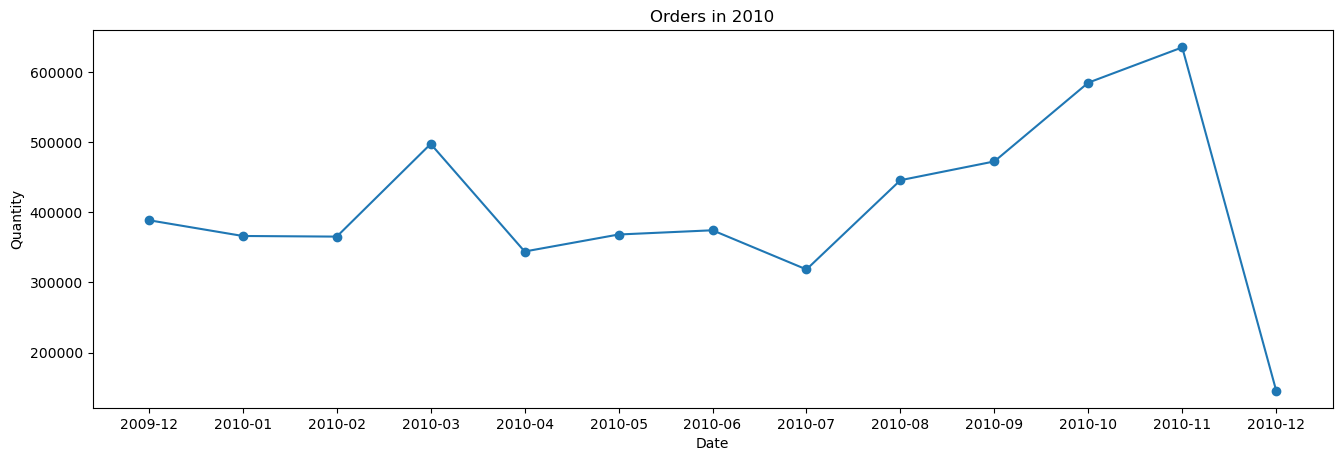

In [28]:
lineplot(df3_date, x=df3_date.Date, y=df3_date.Quantity,title='Orders in 2010')

After exploring the `Invoice_Date` feature, we found that  there were fluctuation in total sales each month in 2010 with highest peak total sales occur in November 2010. 

#### 5. `Country` feature exploration

In [29]:
df4 = df.copy()
df4['Revenue'] = df4['Quantity'] * df4['Price']
a = df4.groupby(['Country']).agg(
    country_count = ('Country','count'),
    total_revenue = ('Revenue','sum') 
).reset_index()
a['percentage'] = a['country_count']/a['country_count'].sum()
a.sort_values('percentage',ascending=False)

,Country,country_count,total_revenue,percentage
34,United Kingdom,372705,7.005793e+06,0.907348
9,EIRE,8705,3.282343e+05,0.021192
12,Germany,8120,1.959204e+05,0.019768
11,France,5692,1.296655e+05,0.013857
21,Netherlands,2768,2.638618e+05,0.006739
28,Spain,1271,3.705213e+04,0.003094
30,Switzerland,1187,4.334341e+04,0.002890
3,Belgium,1053,2.264403e+04,0.002564
25,Portugal,1023,2.334369e+04,0.002490
6,Channel Islands,906,2.136732e+04,0.002206


It seems that most of the product sold by the retailer in 2010 is sold locally

#### Data Understanding Conclusion
After we review in depth to each feature in the data, we found few insight. Below are the insight found from the data:
* There were consumer who paid using cards, but it wasn't popular because it only occur 26 times
* Majority of transaction in 2010 happen in UK
* Consumer split into two types, individual consumer and business consumer.
* Product sold from retailer are seasonal with every month had different amount of total transaction
* There were 9816 transaction that being cancelled by consumer

# Exploratory Data Analysis
we will split this section into two steps:
1. Univariate Analysis
2. Bivariate and Multivariate Analysis

There will be a seperate section (ipnyb file) that we will specifically use to do data analysis deeper

## 1. Univariate Analysis
Analysis will be split into two types:
1. Numerical Feature Analysis
2. Categorical Feature Analysis

### 1.1 Numerical Feature Analysis

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


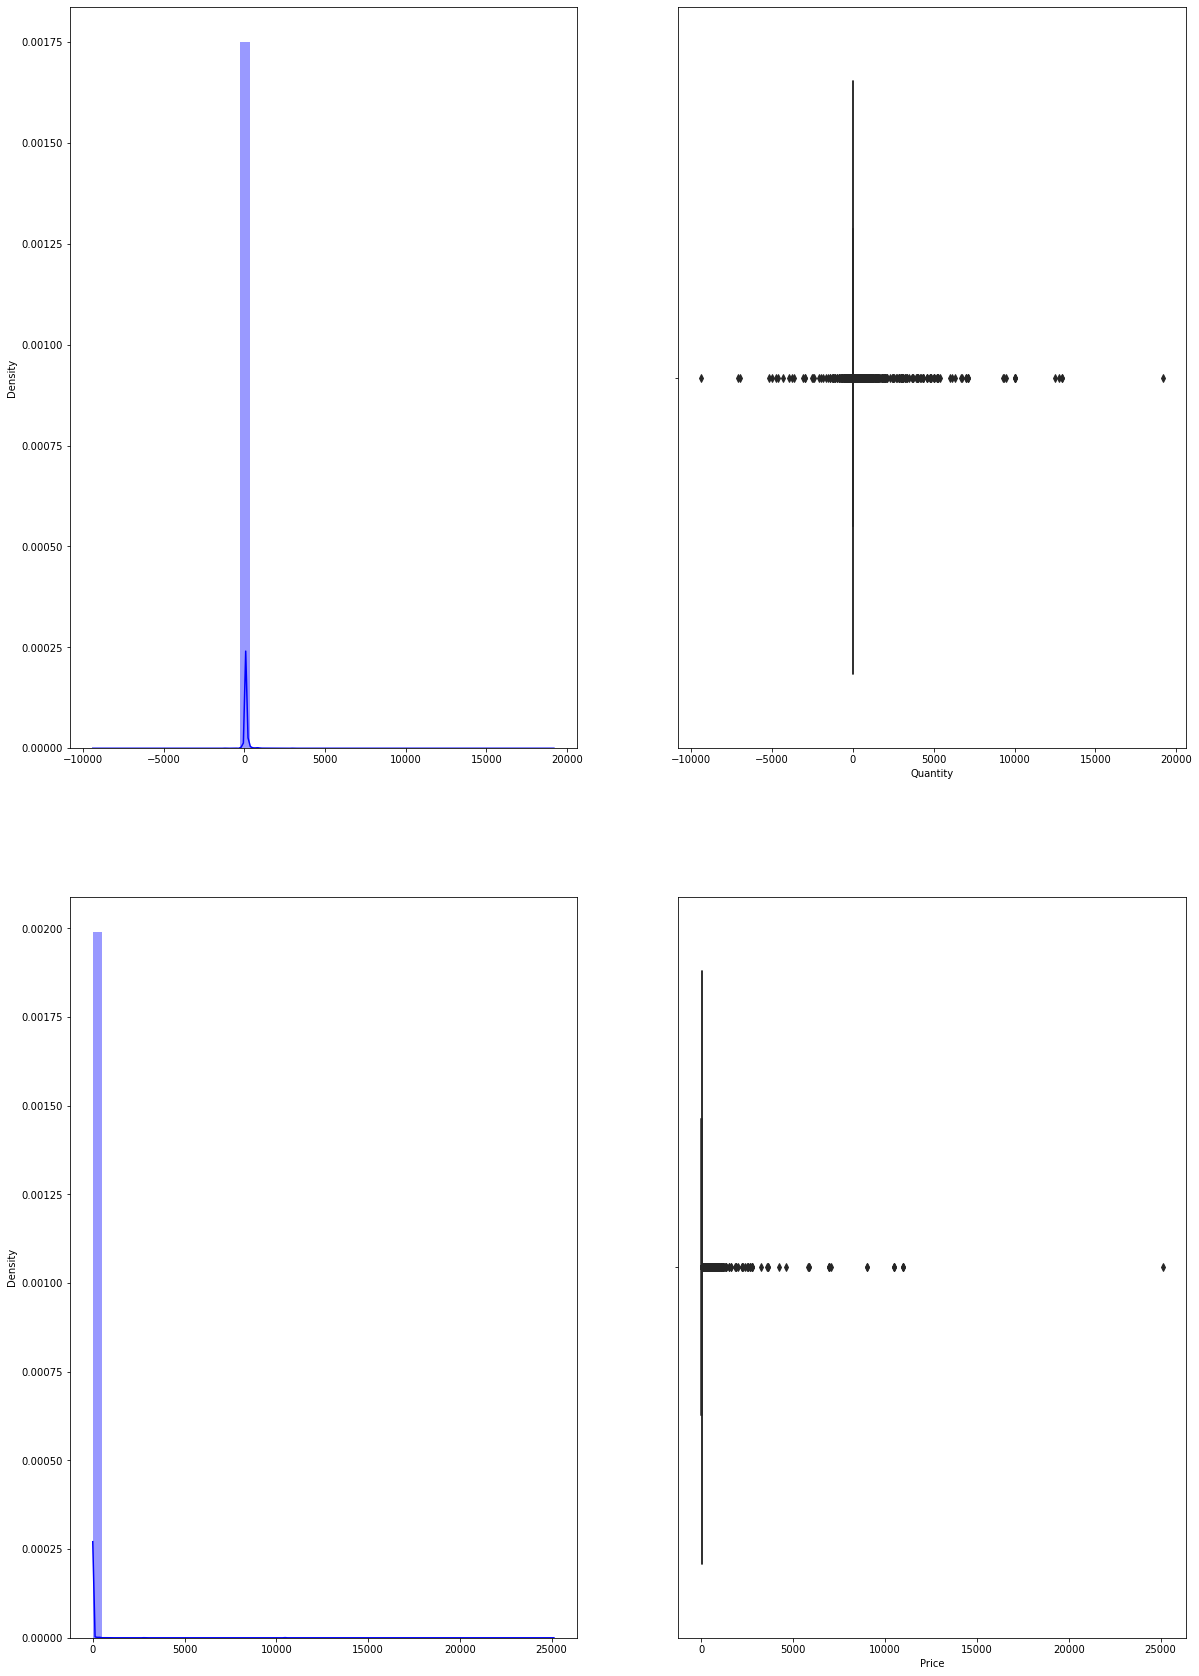

In [30]:
features = ["Quantity","Price"]
fig, axs = plt.subplots(len(features),2,figsize=(20,30))
    
for idx, column in enumerate(features):
    sns.distplot(
        x=df[column], 
        color='blue', 
        ax=axs[idx][0])
    sns.boxplot(
        x=df[column],
        color='green',
        ax=axs[idx][1]
        )

Note from the result:
* There were outlier in `Quantity` and `Price` Feature
* `Quantity` and `Price` had skewed distribution

### 1.2 Categorical Feature Analysis

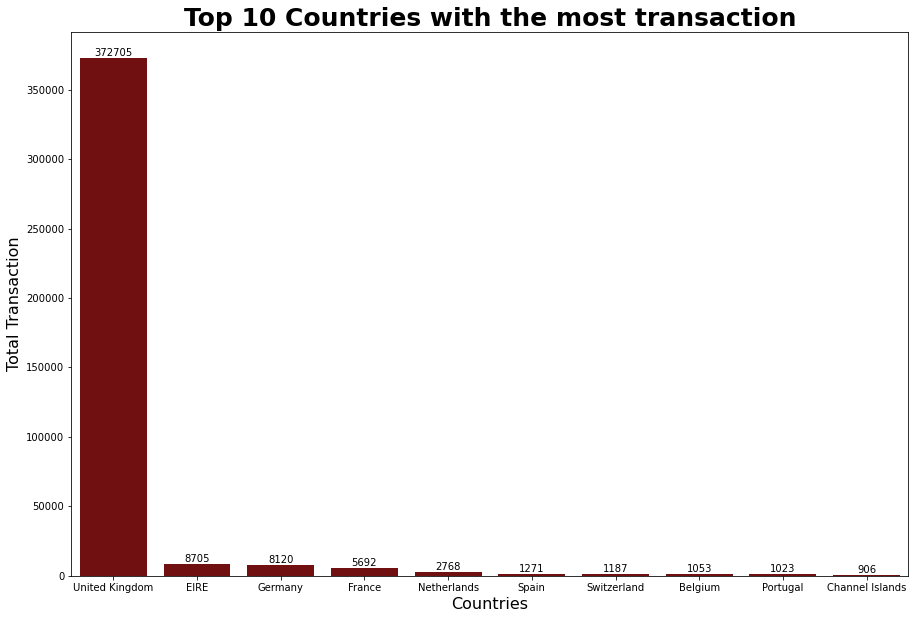

In [31]:
fig, ax = plt.subplots(figsize=(15,10))
a1 = a.sort_values('percentage',ascending=False)
a1 = a1.head(10)
sns.barplot(x ='Country',y='country_count',data=a1,ax=ax,color ='maroon')
ax.set_title('Top 10 Countries with the most transaction', fontsize=25, fontweight='bold')
ax.set_xlabel('Countries', fontsize=16, fontweight='normal')
ax.set_ylabel('Total Transaction', fontsize=16, fontweight='normal')

labels = a1['country_count']

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )

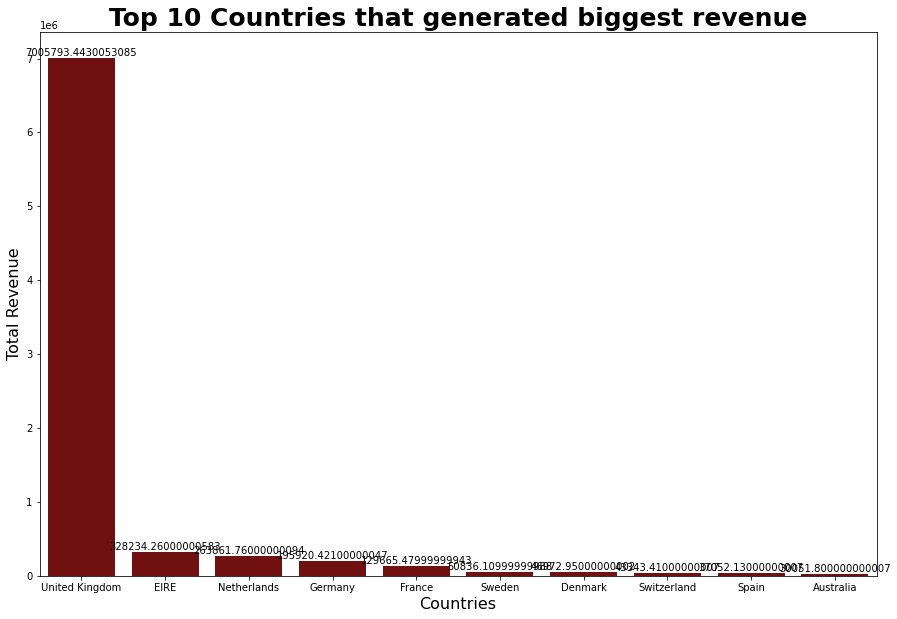

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
a1 = a.sort_values('total_revenue',ascending=False)
a1 = a1.head(10)
sns.barplot(x ='Country',y='total_revenue',data=a1,ax=ax,color ='maroon')
ax.set_title('Top 10 Countries that generated biggest revenue', fontsize=25, fontweight='bold')
ax.set_xlabel('Countries', fontsize=16, fontweight='normal')
ax.set_ylabel('Total Revenue', fontsize=16, fontweight='normal')

labels = a1['total_revenue']

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )

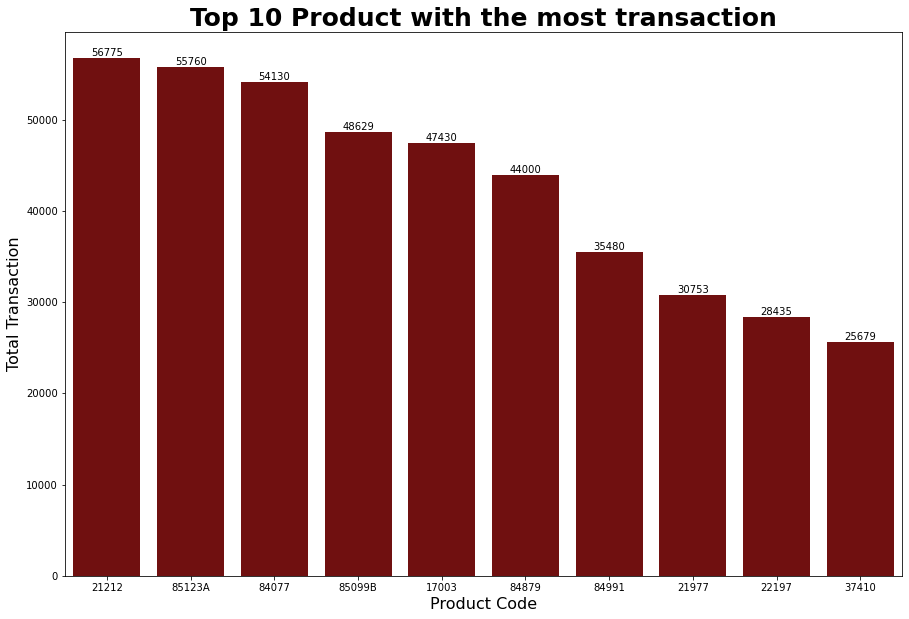

In [33]:
b = df.groupby(['StockCode']).agg(
    stock_count = ('Quantity','sum')
).reset_index()

fig, ax = plt.subplots(figsize=(15,10))
b1 = b.sort_values('stock_count',ascending=False)
b1 = b1.head(10)
sns.barplot(x ='StockCode',y='stock_count',data=b1,ax=ax,color ='maroon')
ax.set_title('Top 10 Product with the most transaction', fontsize=25, fontweight='bold')
ax.set_xlabel('Product Code', fontsize=16, fontweight='normal')
ax.set_ylabel('Total Transaction', fontsize=16, fontweight='normal')

labels = b1['stock_count']

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )

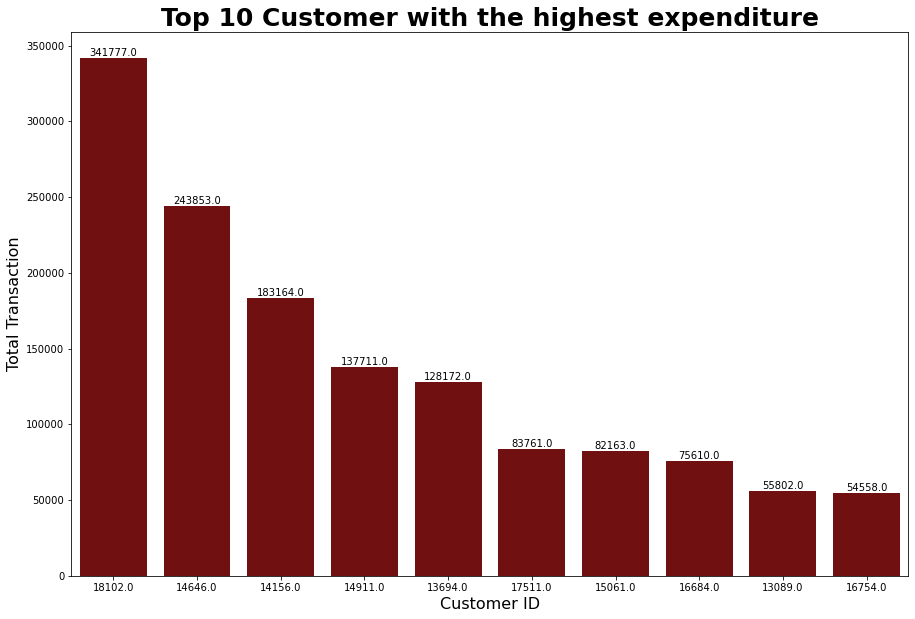

In [34]:
df['Total_Price'] = df['Quantity'] * df['Price']
c = df.groupby(['Customer ID']).agg(
    gross_income = ('Total_Price','sum')
).reset_index()
c['Customer ID'] = c['Customer ID'].astype(str)
c['gross_income'] = c['gross_income'].round(0)
fig, ax = plt.subplots(figsize=(15,10))
c1 = c.sort_values('gross_income',ascending=False)
c1 = c1.head(10)
sns.barplot(x ='Customer ID',y='gross_income',data=c1,ax=ax,color ='maroon')
ax.set_title('Top 10 Customer with the highest expenditure', fontsize=25, fontweight='bold')
ax.set_xlabel('Customer ID', fontsize=16, fontweight='normal')
ax.set_ylabel('Total Transaction', fontsize=16, fontweight='normal')

labels = c1['gross_income']

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )

# Data Engineering
In this section we will transform the data into a data that can be used for modelling. 
<br>
We will transform the data into RFM data frame. RFM stands for Recency, Frequency, Monetary.
* Recency = How long it's been since a customer bought something from the retailer
* Frequency = How often a customer purchase a product from the retailer
* Monetary = Total value of purchase a customer has made

But before we transform it, we need to clean the data so that it can in line with the business goal. 
1. We need to drop the data with country aside of U.K.
2. We need to drop the data that had it's transaction cancelled
3. We need to drop the data that had negative price

(The reason that we focused only to U.K. market is because we want to be inline with the business goals and by our analysis research we found that most revenue and transaction originated from U.K. by far compare to other country)

In [35]:
df = df[(df['Country']=='United Kingdom')&(df['Price']>0)&(df['Quantity']>0)]

## Recency

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364233 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      364233 non-null  object        
 1   StockCode    364233 non-null  object        
 2   Description  364233 non-null  object        
 3   Quantity     364233 non-null  int64         
 4   InvoiceDate  364233 non-null  datetime64[ns]
 5   Price        364233 non-null  float64       
 6   Customer ID  364233 non-null  float64       
 7   Country      364233 non-null  object        
 8   Total_Price  364233 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 27.8+ MB


In [37]:
# UDF to convert string to datetime
def convertDate(x):
    conv_date = dt.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S')
    return conv_date
# UDF to split date and pick out recent purchase days 
def splitDate(y):
    y = str(y)
    num_days = y.split()[0]
    num_days = int(num_days)
    return num_days
df['InvoiceDate'] = df.loc[:,'InvoiceDate'].apply(convertDate)
max_date = df['InvoiceDate'].max()
df['Recency'] = max_date - df['InvoiceDate']
df['Recency'] = df['Recency'].apply(splitDate)
df_recency = df.groupby(['Customer ID'],as_index=False)["Recency"].min()
df_recency.head()

,Customer ID,Recency
0,12346.0,164
1,12608.0,39
2,12745.0,121
3,12746.0,175
4,12747.0,4


## Monetary

In [38]:
df['Monetary'] = df4['Revenue']
df_monetary = df.groupby(['Customer ID'],as_index=False)["Monetary"].sum()
df_monetary.sort_values('Monetary',ascending=False)

,Customer ID,Monetary
3841,18102.0,349164.35
636,13694.0,131443.19
3403,17511.0,84541.17
1623,15061.0,83284.38
2790,16684.0,80489.21
...,...,...
3851,18115.0,9.70
1609,15040.0,7.49
2222,15913.0,6.30
709,13788.0,3.75


## Frequency

In [39]:
df_frequency = df.groupby(['Customer ID'],as_index=False)["Invoice"].count()
df_frequency.rename(columns={'Customer ID':'Customer ID','Invoice':'Frequency'},inplace=True)
df_frequency

,Customer ID,Frequency
0,12346.0,33
1,12608.0,16
2,12745.0,22
3,12746.0,17
4,12747.0,153
...,...,...
3964,18283.0,217
3965,18284.0,28
3966,18285.0,12
3967,18286.0,67


## Merge Recency, Monetary, and Frequency into one table

In [40]:
df_merge1 = df_recency.merge(df_monetary,how='left',on=['Customer ID'])
df_model = df_merge1.merge(df_frequency,how='left',on=['Customer ID'])
df_model.head()

,Customer ID,Recency,Monetary,Frequency
0,12346.0,164,372.86,33
1,12608.0,39,415.79,16
2,12745.0,121,723.85,22
3,12746.0,175,254.55,17
4,12747.0,4,5061.03,153


In [41]:
df_model = df_model.drop('Customer ID', axis = 1)

## RFM table analysis

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

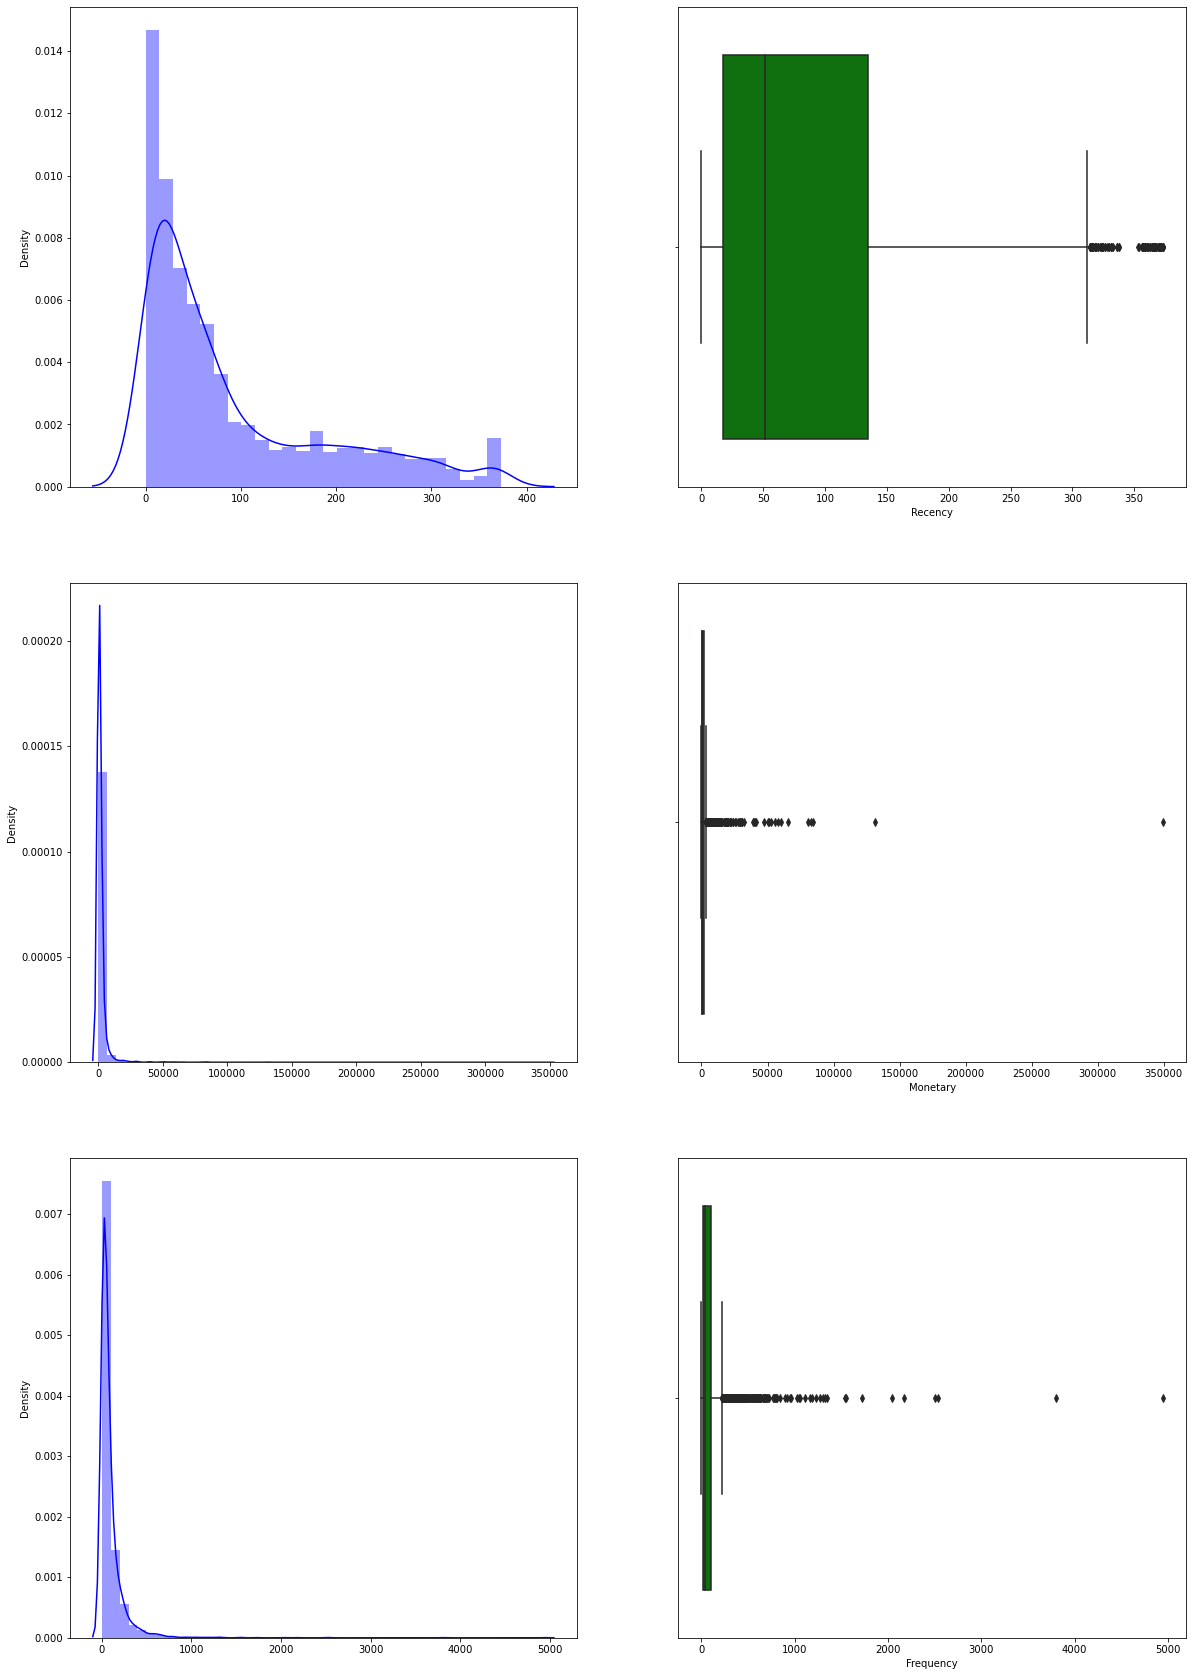

In [42]:
features = ["Recency","Monetary","Frequency"]
fig, axs = plt.subplots(len(features),2,figsize=(20,30))
    
for idx, column in enumerate(features):
    sns.distplot(
        x=df_model[column], 
        color='blue', 
        ax=axs[idx][0])
    sns.boxplot(
        x=df_model[column],
        color='green',
        ax=axs[idx][1]
        )

<AxesSubplot:>

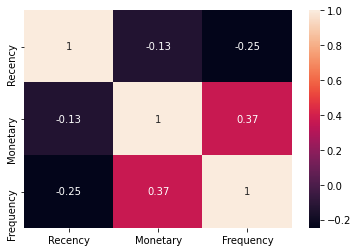

In [43]:
sns.heatmap(df_model.corr(), annot=True)

From simple analysis, we found 2 things:
* There were no features that have high correlation with other feature
* There were outliers in all feature

# Modelling (Using RFM Model and Clustering)

So before I started this segment, I like to explain a little why I use RFM model. The RFM model is a proven method with over 20 years of existence that were used by many practicioner to analyze the market, to find your best customer, understand their behavior and then run targeted email/marketing campaigns to increase sales, satisfaction and customer lifetime value.
<br><br>
The way RFM Model works is to find Recency, Frequency, and Monetary value from data frame, rank them, and combine those score for futher analysis
<br><br>
RFM Model generally will be combine with clustering method such as K-Means for futher analysis and interpretation
<br><br>
You can read this article for further understanding about RFM Model: <p><a href="https://www.putler.com/rfm-analysis/">RFM Analysis</a></p>
<br><br>
We will split this section into two step:
* RFM Score and Interpretation
* K Means Clustering and Interpretation

## RFM Score and Interpretation
The simplest way to create customer segment using RFM Model is to use **Quartiles**. The steps is to assign score 1 to 4 to Recency, Frequency, and Monetary with 4 is the best/highest value and 1 is the lowest/worse value. The final RFM score will be calculated by combining the individual RFM score

In [44]:
quantiles = df_model.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Monetary,Frequency
0.25,17.0,301.65,18.0
0.50,51.0,663.31,43.0
0.75,135.0,1648.18,100.0


### Create RFM Model Segmentation

In [45]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

The reason there were different function for Recency and Frequency Monetary is because high Frequency and Monetary indicating good things but high Recency indicating bad things

In [46]:
rfm = df_model.copy()

In [47]:
rfm['R_Score'] = rfm['Recency'].apply(RScore, args=('Recency',quantiles))
rfm['F_Score'] = rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
rfm['M_Score'] = rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
rfm['Total'] = rfm.R_Score.apply(str) + rfm.F_Score.apply(str) + rfm.M_Score.apply(str)
rfm.head()

,Recency,Monetary,Frequency,R_Score,F_Score,M_Score,Total
0,164,372.86,33,1,2,2,122
1,39,415.79,16,3,1,2,312
2,121,723.85,22,2,2,3,223
3,175,254.55,17,1,1,1,111
4,4,5061.03,153,4,4,4,444


In [48]:
label = [0] * len(rfm)

for i in range(0,len(rfm)):

    if rfm['Total'][i] == '111':
        label[i] = "Best Customers"
        
    elif rfm['Total'][i] == '134' :
        label[i] = "Almost Lost"
        
    elif rfm['Total'][i] == '344':
        label[i] = "Lost Customers"
    
    elif rfm['Total'][i] == '444':
        label[i] = "Lost Cheap Customers"

    elif rfm['F_Score'][i] == 1:
        label[i] = "Loyal Customers"  
    
    elif rfm['M_Score'][i] == 1:
        label[i] = "Big Spenders"   
        
    else:
        label[i] = "Others"

In [49]:
rfm['Label'] = label
rfm

,Recency,Monetary,Frequency,R_Score,F_Score,M_Score,Total,Label
0,164,372.86,33,1,2,2,122,Others
1,39,415.79,16,3,1,2,312,Loyal Customers
2,121,723.85,22,2,2,3,223,Others
3,175,254.55,17,1,1,1,111,Best Customers
4,4,5061.03,153,4,4,4,444,Lost Cheap Customers
...,...,...,...,...,...,...,...,...
3964,17,619.37,217,4,4,2,442,Others
3965,66,461.68,28,2,2,2,222,Others
3966,295,427.00,12,1,1,2,112,Loyal Customers
3967,111,1296.43,67,2,3,3,233,Others


In [50]:
rfm['Label'].value_counts()

Others                  2028
Loyal Customers          672
Lost Cheap Customers     382
Best Customers           352
Big Spenders             313
Lost Customers           203
Almost Lost               19
Name: Label, dtype: int64

### RFM Model Interpretation
After we successfully create segmentation table and label for each different score according to our source in link above, we can interpret and choose the best action according from our source.
<br>
For example, for customer that categorize to Loyal Customer we should upsell higher value products, ask them to give a review, and constantly engage with them

## K Means Clustering and Interpretation
RFM normally can be combine with regression method, k-means clustering, and many more machine learning method. But this time we will focused on using K-Means method because of it's wide used in Market Segmentation
<br>
Before we start modelling, we need to handle the outliers and scale them because K Means Method sensitive with it

### Outlier Handling

In [51]:
column=list(df_model.columns)
for i in column:
        df_model[i] = np.log(df_model[i]+1)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

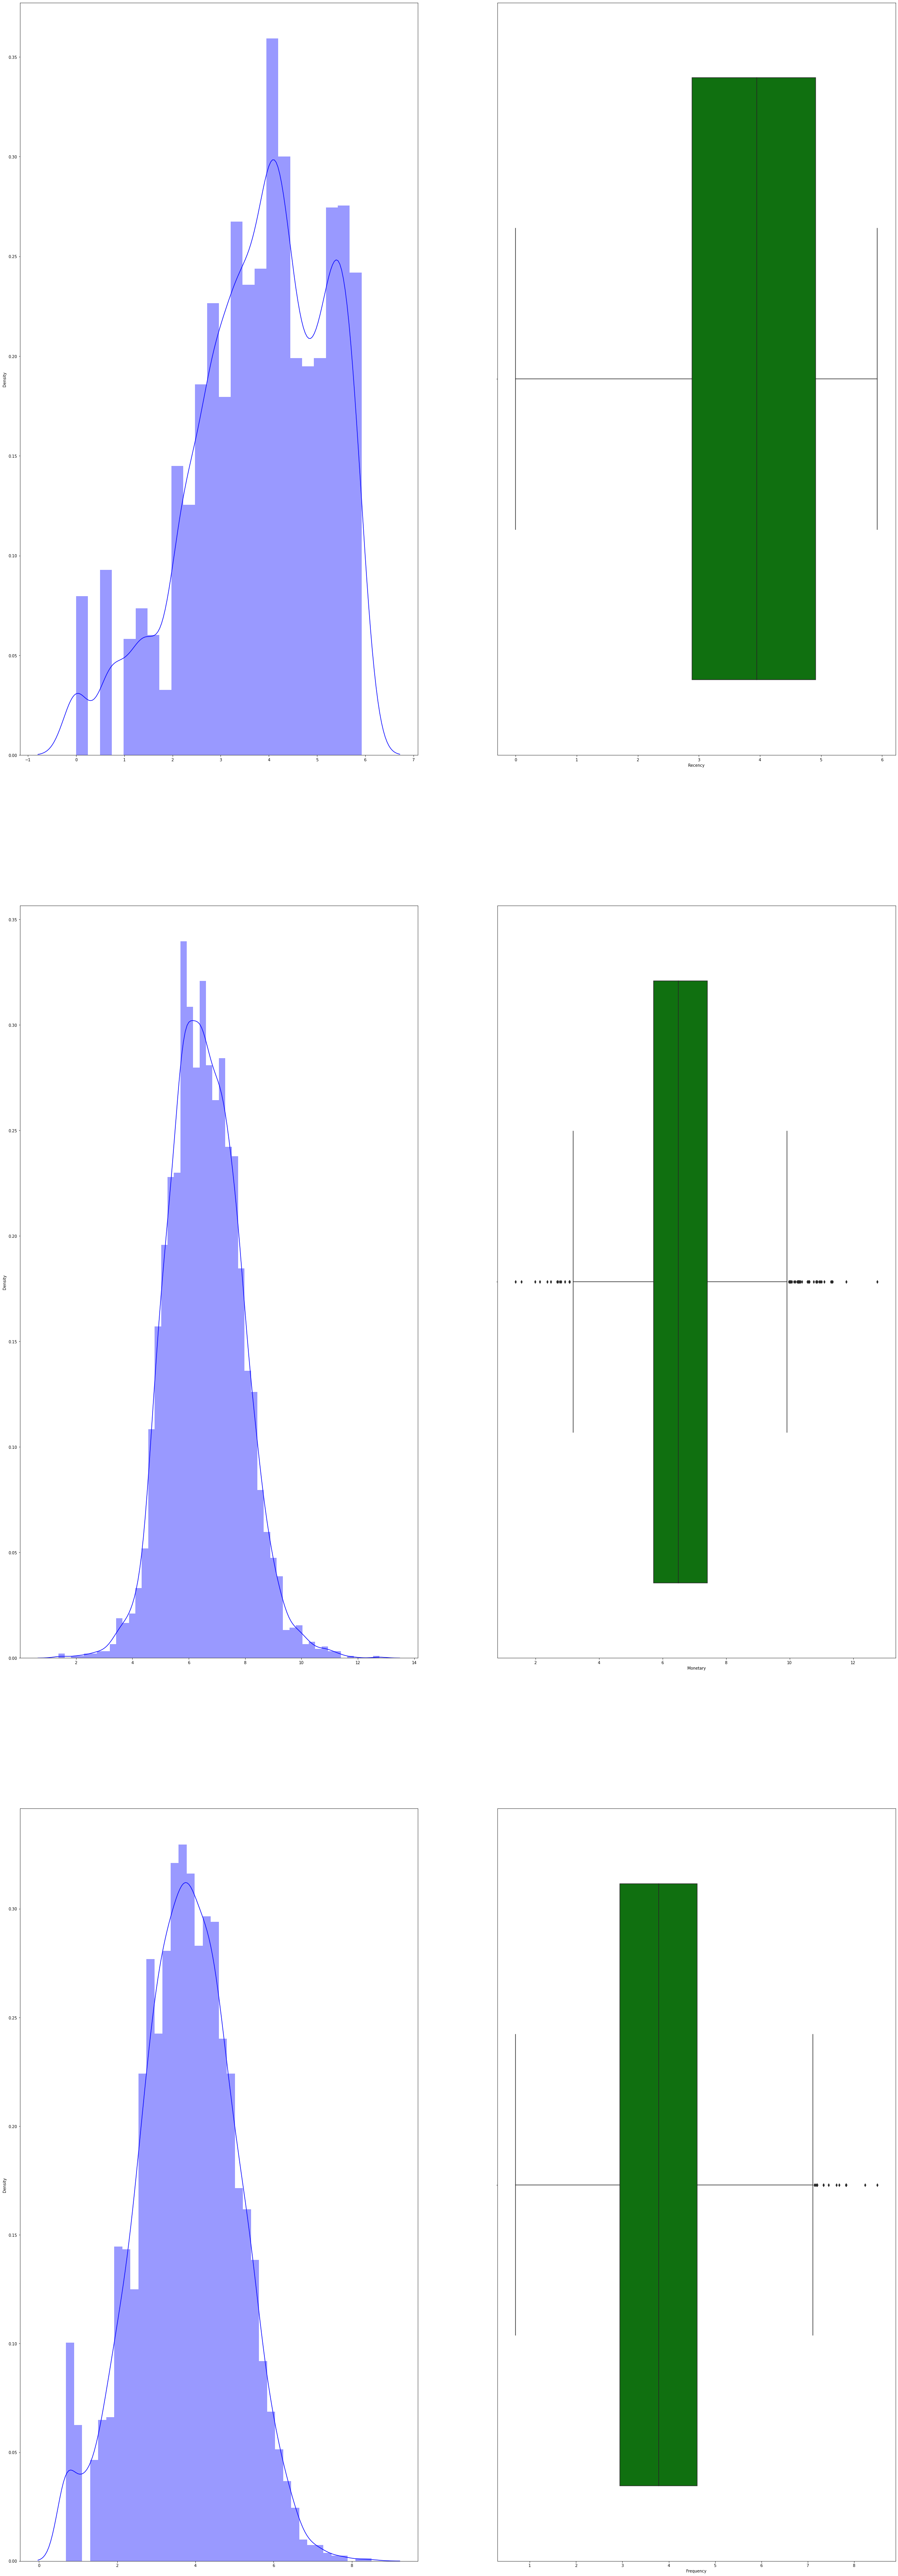

In [52]:
features = column
fig, axs = plt.subplots(len(features),2,figsize=(40,120))
    
for idx, column in enumerate(features):
    sns.distplot(
        x=df_model[column], 
        color='blue', 
        ax=axs[idx][0])
    sns.boxplot(
        x=df_model[column],
        color='green',
        ax=axs[idx][1]
        )

After we handle the outlier data with log transformation, we successfully minimize the outlier data and minimize the the skewness of each feature.
Our next step is to scale the data using MinMaxScaler

### Scaling The Data using MinMaxScaler
In general there were 2 common method used for scaling the data, `MinMaxScaler` and `StandardScaler`. We will used `MinMaxScaler` because as we seen above, the distribution aren't quite perfectly illustrate Normal Distribution, `StandardScaler` have a criteria that the data should be in Normal Distribution. 

In [53]:
scaler = MinMaxScaler()
scaler.fit(df_model)
rfm_model = scaler.transform(df_model)

In [54]:
rfm_model = pd.DataFrame(rfm_model, columns=df_model.columns)
rfm_model

,Recency,Monetary,Frequency
0,0.861871,0.399502,0.362629
1,0.622674,0.409046,0.273911
2,0.810907,0.457633,0.312601
3,0.872765,0.366098,0.281227
4,0.271669,0.628276,0.555973
...,...,...,...
3964,0.487888,0.443967,0.600455
3965,0.709742,0.418217,0.342270
3966,0.960519,0.411376,0.239576
3967,0.796471,0.508748,0.451346


### Choosing the optimal K value

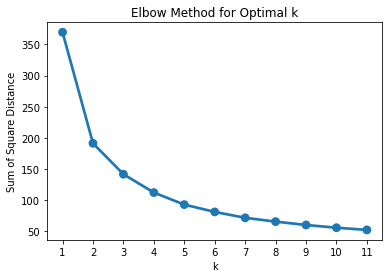

In [55]:
SSE = []
for k in range(0,11):
    kmeans = KMeans(n_clusters=k+1).fit(rfm_model)
    SSE.append(kmeans.inertia_)
sns.pointplot(x=list(range(1,12)), y=SSE)
plt.xlabel('k')
plt.ylabel('Sum of Square Distance')
plt.title('Elbow Method for Optimal k')
plt.show()

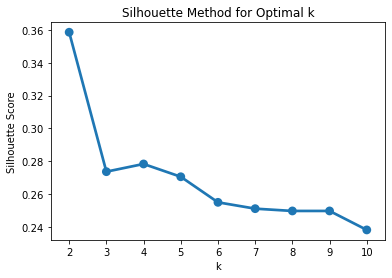

In [56]:
sil = []
kmax = 10
for k in range (2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(rfm_model)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_model,labels,metric='euclidean'))
sns.pointplot(x=list(range(2,kmax+1)), y=sil)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

We will use elbow methode and silhouette method for choosing the optimal k. By visualization, it seems that K=2 is the optimal K value. But because 2 cluster is inadequate to interpret the market segmentation, we will look in K=3 and above.
<br>
If we look the elbow method result, there are no significant curve (elbow shape) that can we choose as optimal K, as the result we will check the silhouette score. 
<br>
Unlike the elbow method, silhouette method look for k with the highest silhouette score. The highest silhouette score according to the visualization above is K=4.
<br>
So continue on we will use K=4 as the optimal k value/cluster 

In [57]:
cluster = 4
kmeans= KMeans(n_clusters=cluster,random_state=1)
kmeans.fit(rfm_model)
rfm['cluster']= kmeans.predict(rfm_model)
rfm_model['cluster']= kmeans.predict(rfm_model)
rfm_model

,Recency,Monetary,Frequency,cluster
0,0.861871,0.399502,0.362629,2
1,0.622674,0.409046,0.273911,0
2,0.810907,0.457633,0.312601,2
3,0.872765,0.366098,0.281227,2
4,0.271669,0.628276,0.555973,1
...,...,...,...,...
3964,0.487888,0.443967,0.600455,3
3965,0.709742,0.418217,0.342270,0
3966,0.960519,0.411376,0.239576,2
3967,0.796471,0.508748,0.451346,3


In [58]:
data = rfm_model.groupby('cluster').agg(
    Recency = ('Recency','mean'),
    Frequency = ('Frequency','mean'),
    Monetary = ('Monetary','mean')
).reset_index()
data

,cluster,Recency,Frequency,Monetary
0,0,0.575657,0.282637,0.391551
1,1,0.281724,0.547309,0.562011
2,2,0.888824,0.272924,0.375614
3,3,0.655895,0.503823,0.523023


Text(0, 0.5, 'Monetary')

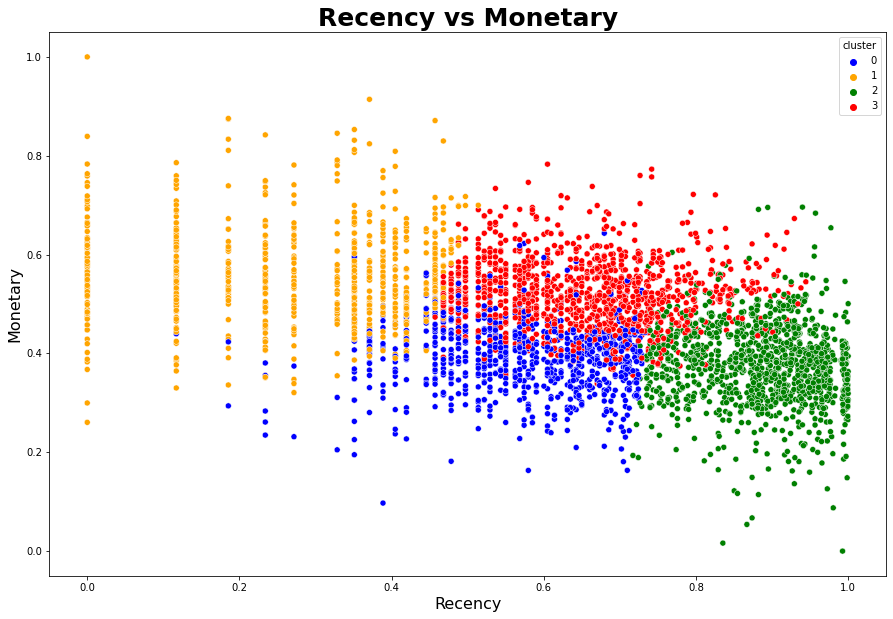

In [59]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=rfm_model, x='Recency', y='Monetary',hue='cluster',
    palette=['blue','orange','green','red'])
ax.set_title('Recency vs Monetary', fontsize=25, fontweight='bold')
ax.set_xlabel('Recency', fontsize=16, fontweight='normal')
ax.set_ylabel('Monetary', fontsize=16, fontweight='normal')

Text(0, 0.5, 'Monetary')

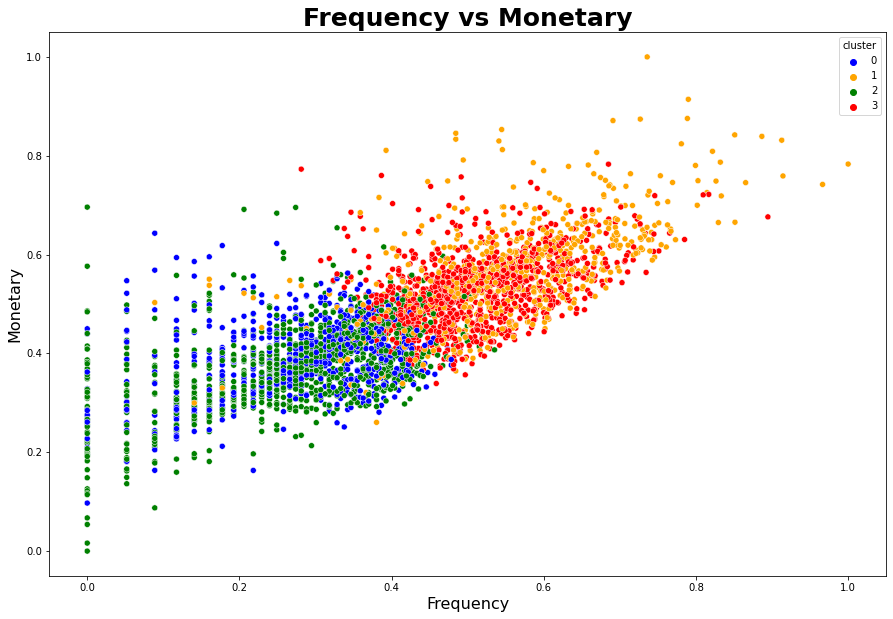

In [60]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=rfm_model, x='Frequency', y='Monetary',hue='cluster',
    palette=['blue','orange','green','red'])
ax.set_title('Frequency vs Monetary', fontsize=25, fontweight='bold')
ax.set_xlabel('Frequency', fontsize=16, fontweight='normal')
ax.set_ylabel('Monetary', fontsize=16, fontweight='normal')

Text(0, 0.5, 'Frequency')

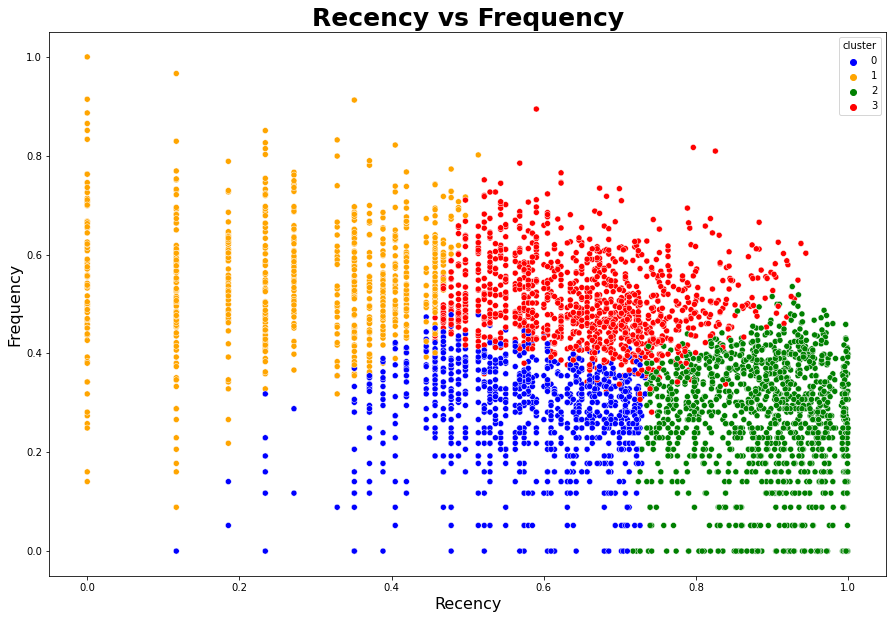

In [61]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=rfm_model, x='Recency', y='Frequency',hue='cluster',
    palette=['blue','orange','green','red'])
ax.set_title('Recency vs Frequency', fontsize=25, fontweight='bold')
ax.set_xlabel('Recency', fontsize=16, fontweight='normal')
ax.set_ylabel('Frequency', fontsize=16, fontweight='normal')

In [62]:
data = rfm[['R_Score','F_Score','M_Score','cluster']]
sns.lineplot

<function seaborn.relational.lineplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='auto', ax=None, **kwargs)>

<ipython-input-63-afa3490f2d96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.labels_
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


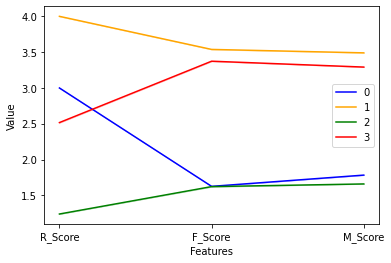

In [63]:
data['cluster'] = kmeans.labels_


melted_rfm_normalized = pd.melt(data.reset_index(), 
                                id_vars=['cluster'],
                               value_vars=['R_Score','F_Score','M_Score'],
                               var_name='Features',
                               value_name='Value')
sns.lineplot('Features','Value', hue='cluster',data=melted_rfm_normalized, ci=False, palette=['blue','orange','green','red'])
plt.legend()

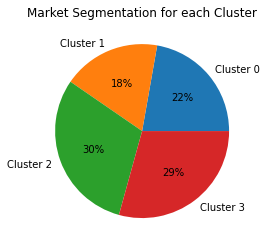

In [64]:
final = rfm_model.groupby('cluster').agg(
    count = ('cluster','count')
).reset_index()
final['percentage'] = ((final['count']/final['count'].sum()).round(2))*100
for e in list(final['cluster']):
    final['cluster'] =final['cluster'].replace(e,f'Cluster {e}')
colors = sns.color_palette('pastel')[0:5]
plt.pie(final['percentage'],labels=final['cluster'],autopct='%.0f%%')
plt.title('Market Segmentation for each Cluster')
plt.show()

### K Means Interpretation
By Looking to the result above, The following will be mentioned the interpretation of the results of each cluster formed:  

* Cluster 0 = This Cluster contains 22% of total customers. It belongs to the "Loyal Customer" segment because customers haven't done transactions recently but they purchase products frequently and spend a lot in the retailer.

* Cluster 1 = This Cluster contain 18% of total customer. It belongs to the "Lost Cheap Customer" because customers haven't done transactions recently, rarely purchase products, and only spent a little amount in the retailer.

* Cluster 2 = This Cluster contain 30% of total customer. It belongs to the "Best Customer" because customers have done transactions recently, purchase products frequently, and spend a lot of money in the retailer.

* Cluster 3 = This Cluster contains 20% of the total customer. It belongs to the "Promising/New Entrant" because customers have done transactions recently but rarely purchase products and spend little amount in the retailer.


# Recommendation
By looking through the cluster interpretation and RFM model interpretation above, we created recommendation for each customer segment based on Recency, Frequency, and Monetary that listed below:

* For the `Loyal Customer` segment: Retailer must as much as possible retain customers in this segment because the customers in this cluster tend to spend a lot of money and purchase frequently. What the retailer suggested is to do is allocate some budget for giving promotion to the customer in this segment. They can send messages through Whatsapp or email to inform customers that they just got a discount on a product. The goal here is to engage the customer and attract customer attention at the same time so that the customer attracted to buy product again and at the same time retain the customer loyalty
* For the `Best Customer` segment: This segment contains customers that any company dreams of, they purchase recently, frequent buyers, and spend a lot of money in the company. What the retailer suggested to do is to reward the customer in this segment. You can do it by giving them early access to the product, giving them discount vouchers, and many more. The goal is to retain customer loyalty and also motivate customer to keep purchasing and spend more money 
* For `Lost Cheap Customer`: This segment contains customers that are disliked by all companies, because customers in this segment haven't done transactions recently, rarely purchase products, and only spent little amount in the retailer. What the retailer suggested to do is to start a marketing campaign to reach out to customers and revive their interest into the company product. 
* For `Promising/New Entrant` segment: This segment contains customers that recently/first time bought products in the company. This was symbolized by the high recency and low score in frequency and monetary. What the retailer suggested to do is to create brand awareness to this kind of customer and also offer a free trial to the product. The goal here is to instill the retailer brand to the customer, make a good impression to customers, and persuade them to buy more.
